# Method 1: Variance Threshold


In [7]:
# Import pandas to create DataFrame

import pandas as pd

# Make DataFrame of the given data

data = pd.DataFrame({'A':[1,2,4,1,2,4],
                    'B': [4,5,6,7,8,9],
                    'C': [0,0,0,0,0,0],
                    'D': [1,1,1,1,1,1]})

In [8]:
data.head()

,A,B,C,D
0,1,4,0,1
1,2,5,0,1
2,4,6,0,1
3,1,7,0,1
4,2,8,0,1


### Variance Threshold

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [9]:
# If threshold=0, it removes the zero variance features.
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [10]:
var_thres.get_support()

array([ True,  True, False, False])

In [11]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [12]:
# columns which have zero variance
constant_columns = [column for column in data.columns
                   if column not in data.columns[var_thres.get_support()]]

for feature in constant_columns:
    print(feature)

C
D


In [13]:
data.drop(constant_columns, axis = 1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


 feature selection on the following dataset: https://www.kaggle.com/competitions/santander-customer-satisfaction/data 

In [14]:
df = pd.read_csv('/media/mrinal/alex/Feature Selection/santander-customer-satisfaction/train.csv', nrows = 10000)

In [15]:
df.shape

(10000, 371)

In [16]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [17]:
X = df.drop(labels =['TARGET'], axis = 1)
y = df['TARGET']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels = ['TARGET'], axis = 1),
    df['TARGET'],
    test_size = 0.2,
    random_state = 42)

X_train.shape, X_test.shape

((8000, 370), (2000, 370))

In [19]:
# lets apply variance threshold now

var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [20]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
# columns which contain some variance (non-constant columns)
X_train.columns[var_thres.get_support()]

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=281)

In [22]:
# finding the constant terms

constant_columns = [column for column in X_train.columns
                   if column not in X_train.columns[var_thres.get_support()]]

for column in constant_columns:
    print(column)

ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_in_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_in_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_

In [23]:
# dropping the constant columns from the dataset
X_train.drop(constant_columns, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
9254,18619,2,42,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105485.46
1561,3087,2,26,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149524.29
1670,3321,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102309.84
6087,12224,2,48,0.0,281.46,281.46,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102065.01
6669,13391,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80648.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,11502,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78929.94
5191,10394,2,49,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127000.77
5390,10815,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95723.88
860,1703,2,17,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.34


# Method 2: Feature Selection with Correlation

In this step we will be removing the features which are highly correlated

In [24]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# load dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['MEDV'] = data.target

In [26]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
X = df.drop('MEDV', axis = 1)
y = df['MEDV']

In [29]:
# split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [30]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.198855,0.400198,-0.044589,0.396406,-0.200303,0.334090,-0.366487,0.615947,0.576894,0.288970,-0.356858,0.414142
ZN,-0.198855,1.000000,-0.533489,-0.043754,-0.526414,0.274661,-0.575078,0.681817,-0.313790,-0.294267,-0.389163,0.178652,-0.396572
INDUS,0.400198,-0.533489,1.000000,0.095158,0.770957,-0.398690,0.636569,-0.707566,0.588952,0.702353,0.348303,-0.363151,0.603644
CHAS,-0.044589,-0.043754,0.095158,1.000000,0.135476,0.111272,0.096016,-0.121671,0.028685,0.007746,-0.113003,0.041666,-0.070652
NOX,0.396406,-0.526414,0.770957,0.135476,1.000000,-0.299615,0.720417,-0.772330,0.589061,0.650247,0.161253,-0.368034,0.593862
RM,-0.200303,0.274661,-0.398690,0.111272,-0.299615,1.000000,-0.210863,0.198299,-0.199738,-0.281127,-0.342643,0.113347,-0.612577
AGE,0.334090,-0.575078,0.636569,0.096016,0.720417,-0.210863,1.000000,-0.756589,0.430321,0.471670,0.240841,-0.265186,0.571051
DIS,-0.366487,0.681817,-0.707566,-0.121671,-0.772330,0.198299,-0.756589,1.000000,-0.483329,-0.523577,-0.217588,0.291122,-0.494921
RAD,0.615947,-0.313790,0.588952,0.028685,0.589061,-0.199738,0.430321,-0.483329,1.000000,0.912527,0.472257,-0.439387,0.480301
TAX,0.576894,-0.294267,0.702353,0.007746,0.650247,-0.281127,0.471670,-0.523577,0.912527,1.000000,0.444836,-0.442027,0.530632


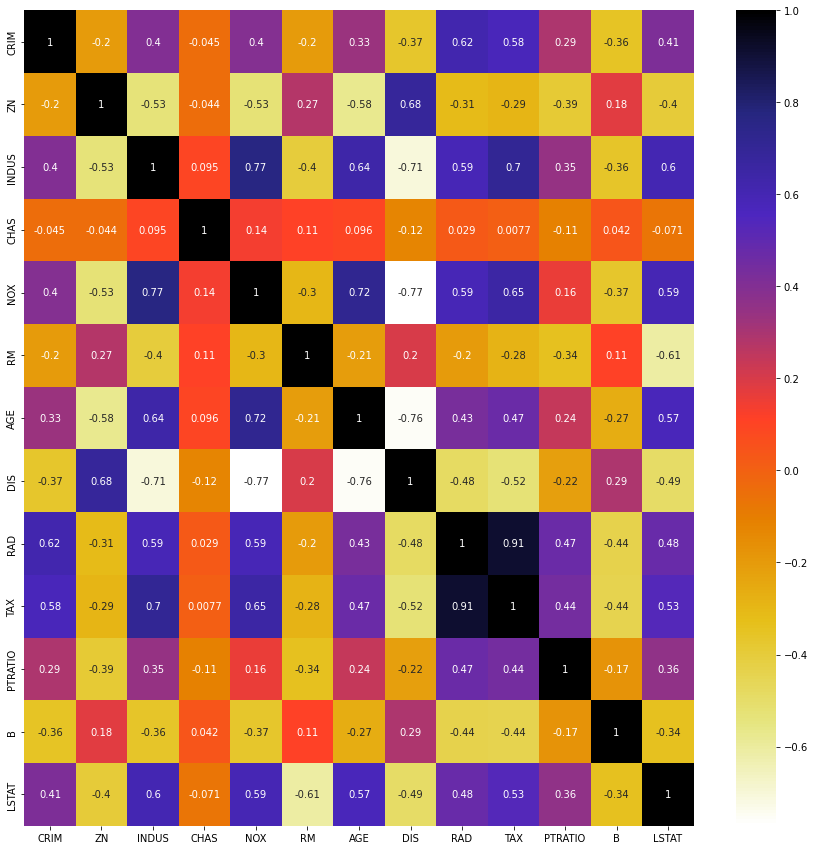

In [31]:
import seaborn as sns
plt.figure(figsize = (15,15))
cor = X_train.corr()  # pearson correlation 
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [32]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                  colname = corr_matrix.columns[i]
                  col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

3

In [34]:
corr_features

{'DIS', 'NOX', 'TAX'}

In [35]:
# drop the correlated features

X_train.drop(corr_features, axis = 1)
X_test.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,6.416,84.1,5.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,6.758,32.9,4.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,5.983,98.8,4.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,6.065,7.8,4.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,6.297,91.8,24.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0.0,4.628,100.0,24.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0.0,6.461,93.3,24.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0.0,6.657,100.0,24.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0.0,6.015,45.1,3.0,18.5,395.99,12.86


In [36]:
# lets try this with big dataset
df_santander = pd.read_csv('/media/mrinal/alex/Feature Selection/santander-customer-satisfaction/train.csv', nrows = 10000)
X = df_santander.drop(labels = ['TARGET'], axis = 1)
y = df_santander['TARGET']

# split into train and test

X_train, X_test, y_train, y_test = train_test_split(
    df_santander.drop(labels = ['TARGET'], axis = 1),
    df_santander['TARGET'],
    test_size = 0.2,
    random_state = 42
)

<AxesSubplot:>

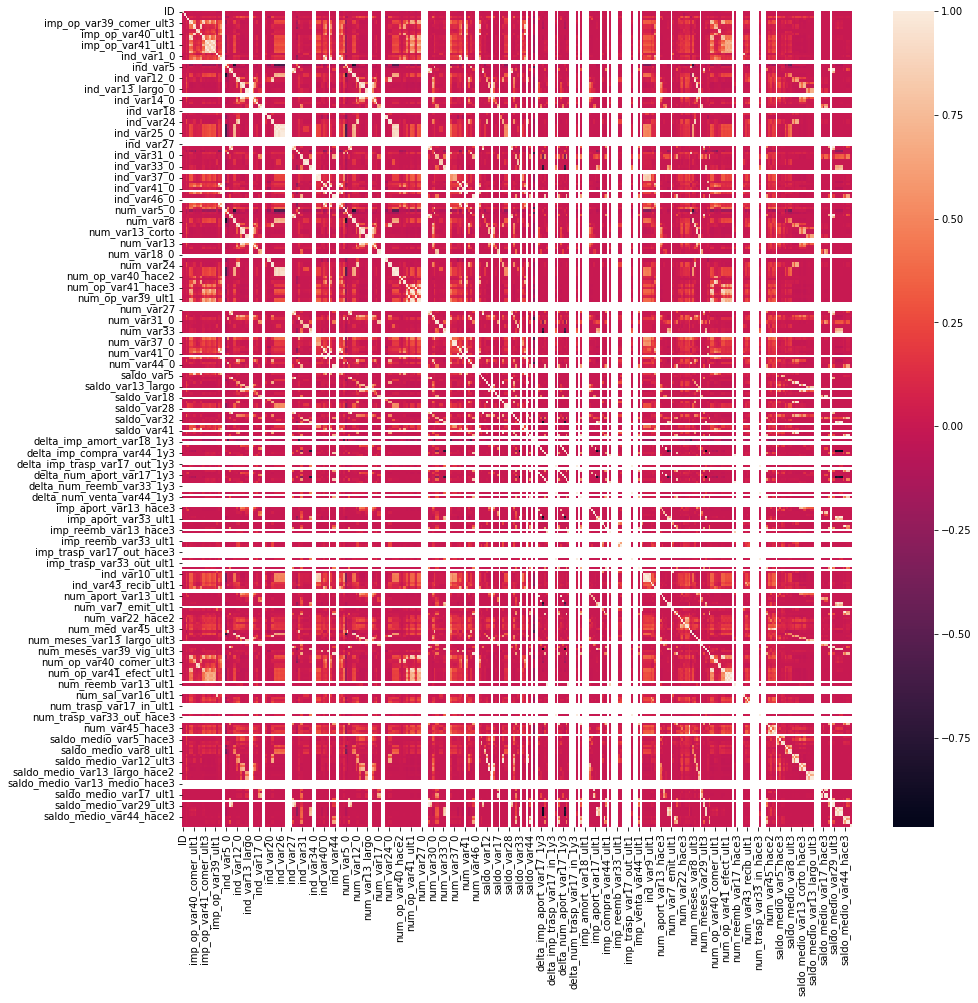

In [37]:
corr_mat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
sns.heatmap(corr_mat)

In [38]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

152

In [39]:
X_train.drop(corr_features, axis = 1)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var13_largo_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
9254,18619,2,42,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,105485.46
1561,3087,2,26,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,149524.29
1670,3321,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,102309.84
6087,12224,2,48,0.0,281.46,281.46,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,102065.01
6669,13391,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,80648.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,11502,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,78929.94
5191,10394,2,49,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,127000.77
5390,10815,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,95723.88
860,1703,2,17,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0,0,0,0,0.0,0.0,0,0.0,101492.34


# Feature Selection using Mutual Information for Classification Problem Statements

Mutual information (MI) between two random variables (X and Y) is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

It can be used for univariate features selection

In [40]:
df = pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
# checking the unique no.of wine available
df['Wine'].unique()

array([1, 2, 3])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [43]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        df.drop(labels = 'Wine', axis = 1),
        df['Wine'],
        test_size = 0.3,
        random_state = 42
        )

X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
104,12.51,1.73,1.98,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
78,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290


In [44]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.43590921, 0.30133217, 0.12631774, 0.25364227, 0.21132867,
       0.390753  , 0.71080405, 0.11802608, 0.35260302, 0.53102383,
       0.58146754, 0.51777309, 0.53634376])

In [45]:
type(mutual_info)

numpy.ndarray

In [46]:
# Convert mutual_info to pandas series
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

Flavanoids              0.710804
Hue                     0.581468
Proline                 0.536344
Color.int               0.531024
OD                      0.517773
Alcohol                 0.435909
Phenols                 0.390753
Proanth                 0.352603
Malic.acid              0.301332
Acl                     0.253642
Mg                      0.211329
Ash                     0.126318
Nonflavanoid.phenols    0.118026
dtype: float64

<AxesSubplot:>

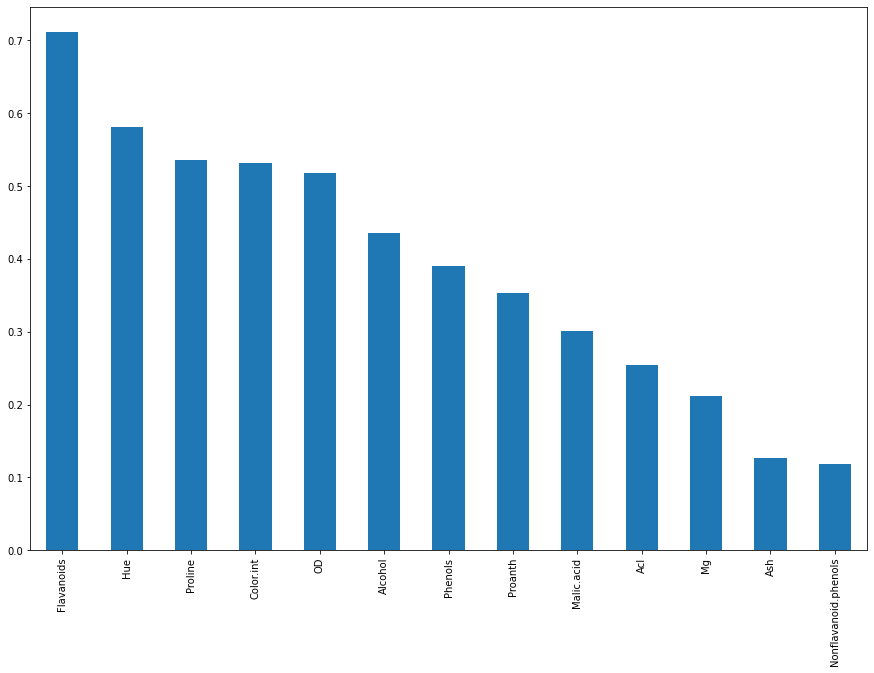

In [47]:
# Plot the ordered mutual_info values per feature

mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,10))

In [48]:
# select the K-best features

from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k = 5) # here the value of K in taken as 5
sel_five_cols.fit(X_train, y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

# Feature selection using Mutual Information for Regression Problem Statement

In [49]:
housing_df = pd.read_csv('/media/mrinal/alex/Feature Selection/house-prices-advanced-regression-techniques/train.csv')

In [50]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [51]:
housing_df.shape

(1460, 81)

In [52]:
# finding the null values
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [53]:
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include = numeric_lst).columns)

In [54]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [55]:
housing_df = housing_df[numerical_cols]

In [56]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [57]:
housing_df = housing_df.drop('Id', axis = 1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
        housing_df.drop(labels = 'SalePrice', axis = 1),
        housing_df['SalePrice'],
        test_size = 0.3,
        random_state = 42
    )

In [59]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      190
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         3
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [60]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([2.78604786e-01, 1.89201447e-01, 1.53384877e-01, 5.14667489e-01,
       1.10002073e-01, 3.17052996e-01, 2.54369849e-01, 8.25981345e-02,
       1.44439029e-01, 9.20388239e-04, 1.48415762e-01, 3.16510705e-01,
       2.87641046e-01, 2.21087007e-01, 5.42779013e-04, 4.50532800e-01,
       2.66370340e-02, 2.83631870e-03, 2.31235289e-01, 6.04795898e-02,
       5.66820168e-02, 4.09455053e-02, 1.57509092e-01, 1.55354524e-01,
       2.66898221e-01, 3.57984880e-01, 3.41427074e-01, 9.10149244e-02,
       1.56060350e-01, 2.30316351e-02, 0.00000000e+00, 1.05556237e-02,
       1.02375637e-02, 0.00000000e+00, 2.31196193e-04, 1.92635828e-03])

In [61]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

OverallQual      0.514667
GrLivArea        0.450533
GarageCars       0.357985
GarageArea       0.341427
YearBuilt        0.317053
TotalBsmtSF      0.316511
1stFlrSF         0.287641
MSSubClass       0.278605
GarageYrBlt      0.266898
YearRemodAdd     0.254370
FullBath         0.231235
2ndFlrSF         0.221087
LotFrontage      0.189201
TotRmsAbvGrd     0.157509
OpenPorchSF      0.156060
Fireplaces       0.155355
LotArea          0.153385
BsmtUnfSF        0.148416
BsmtFinSF1       0.144439
OverallCond      0.110002
WoodDeckSF       0.091015
MasVnrArea       0.082598
HalfBath         0.060480
BedroomAbvGr     0.056682
KitchenAbvGr     0.040946
BsmtFullBath     0.026637
EnclosedPorch    0.023032
ScreenPorch      0.010556
PoolArea         0.010238
BsmtHalfBath     0.002836
YrSold           0.001926
BsmtFinSF2       0.000920
LowQualFinSF     0.000543
MoSold           0.000231
3SsnPorch        0.000000
MiscVal          0.000000
dtype: float64

<AxesSubplot:>

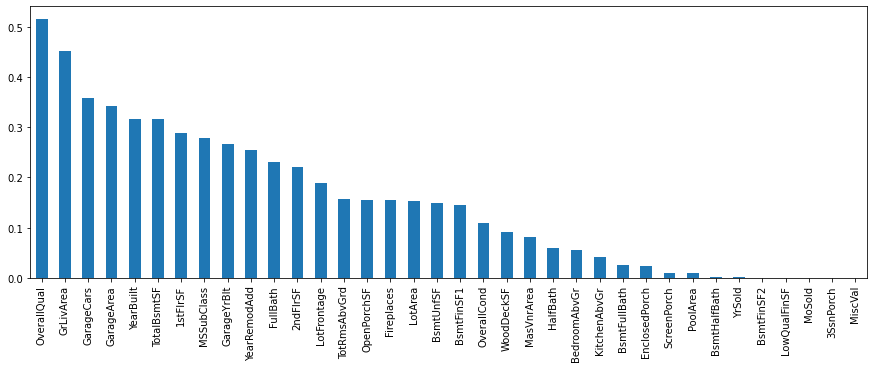

In [62]:
mutual_info.sort_values(ascending = False).plot.bar(figsize = (15,5))

In [63]:
from sklearn.feature_selection import SelectPercentile
# selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile = 20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7ff2c7aca310>)

In [64]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

Mutual Information and Information Gain is sometimes used as a synonym. Technically, they calculate the same
quantity if applied to the same data.

# Chisquare test for Feature Selection

* Commonly used for testing relationships between categorical Variables.
* This Test is applied when we have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [90]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
df = df[['sex', 'embarked', 'alone', 'pclass', 'survived']]
df.head()

,sex,embarked,alone,pclass,survived
0,male,S,False,3,0
1,female,C,False,1,1
2,female,S,True,3,1
3,female,S,False,1,1
4,male,S,True,3,0


In [92]:
# lets perform label encoding
import numpy as np

df['sex'] = np.where(df['sex'] == "male",1,0)

ordinal_label = {k: i for i,k in enumerate(df['embarked'].unique(), 0)}
df['embarked'] = df['embarked'].map(ordinal_label)

df['alone'] = np.where(df['alone'] == True, 1,0)

df.head()

,sex,embarked,alone,pclass,survived
0,1,0,0,3,0
1,0,1,0,1,1
2,0,0,1,3,1
3,0,0,0,1,1
4,1,0,1,3,0


In [93]:
X_train, X_test, y_train, y_test = train_test_split(df[['sex', 'embarked', 'alone', 'pclass']],
                                                   df['survived'], test_size = 0.3, random_state = 42)

In [94]:
X_train.isnull().sum()

sex         0
embarked    0
alone       0
pclass      0
dtype: int64

In [95]:
# Perform Chi2 test
# Returns 2 values Fscore and p-value
from sklearn.feature_selection import chi2
f_p_values = chi2(X_train, y_train)

In [96]:
p_values = pd.Series(f_p_values[1])
p_values.index= X_train.columns
p_values

sex         7.664426e-15
embarked    7.490622e-04
alone       3.840385e-03
pclass      3.015427e-05
dtype: float64

In [97]:
p_values.sort_index(ascending = False)

sex         7.664426e-15
pclass      3.015427e-05
embarked    7.490622e-04
alone       3.840385e-03
dtype: float64

### Observation:
    Sex column is the most important column when compared to the output feature survived.